In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
MyData = pd.read_csv(r"C:\Users\Jaivansh Chawla\Documents\COLLEGE\ML LAB\LAB 3\housing_price_dataset.csv")
MyData

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


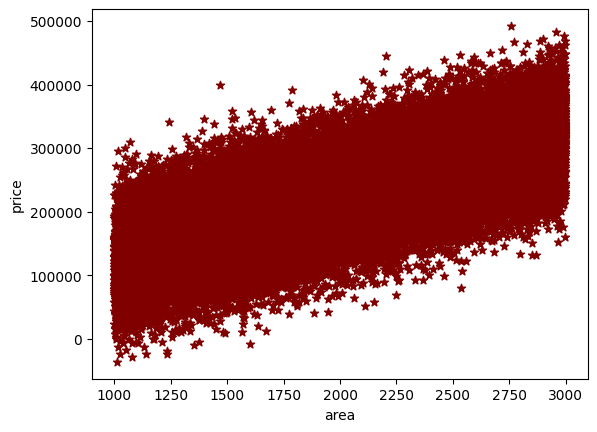

In [6]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(MyData.SquareFeet,MyData.Price,color='maroon',marker='*')

In [7]:
X = MyData.drop(["Bedrooms","Bathrooms","Neighborhood","YearBuilt","Price"] , axis="columns")
Y = MyData.Price

In [8]:
print("Type of X is ",type(X),"Type of Y is ",type(Y))

Type of X is  <class 'pandas.core.frame.DataFrame'> Type of Y is  <class 'pandas.core.series.Series'>


**X is Pandas DataFrame and Y is Pandas Series**

The primary difference between a pandas Series (`pandas.core.series.Series`) and a pandas DataFrame (`pandas.core.frame.DataFrame`) lies in their structure and functionality:

1. **Pandas Series (`pandas.core.series.Series`):**
   - A Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, etc.).
   - It can be thought of as a single column of data.
   - ***Each element in a Series has an associated index***.
   - You can perform various operations on a Series, such as arithmetic operations, slicing, filtering, etc.
   - A Series does not have column names.

2. **Pandas DataFrame (`pandas.core.frame.DataFrame`):**
   - A DataFrame is a two-dimensional labeled data structure with columns of potentially different data types.
   - It can be thought of as a collection of Series where each Series represents a column.
   - ***Besides having row indices, a DataFrame also has column indices***.
   - DataFrames can store and manipulate data in a tabular form, similar to a spreadsheet or SQL table.
   - You can perform operations on both rows and columns of a DataFrame, such as selecting, filtering, merging, joining, etc.
   - DataFrames have column names.

Convert Series to DataFrame
import pandas as pd


***df = series.to_frame()***

 Now, 'df' will be a DataFrame


**Create Train Test Data**

![train test split](https://media.licdn.com/dms/image/D562CAQFp6571kzDGuw/comment-image-shrink_8192_1280/0/1711875550698?e=1712480400&v=beta&t=iq6_tXcIl7gclkTmGMVtZ5FZ75C-M7WoGAx9GZMElFg)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

![Skeleton Of ML training](https://media.licdn.com/dms/image/D5622AQF3AILIWj6qzg/feedshare-shrink_800/0/1711874674727?e=1714608000&v=beta&t=v5E5s0gUV5S2T0EGiK2-ADO9CBVQ4bXIHeW9plcTSNM)


![Regressor Model with Branches](https://media.licdn.com/dms/image/D562CAQGy8aNpjN_68w/comment-image-shrink_8192_480/0/1711875349300?e=1712480400&v=beta&t=ZlrUkeRkJqM_A-fxQk45NZMC0YWwahg1uaoRPTLnPdk)

In [10]:
# Create linear regression object

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
#reg_model = linear_model.LinearRegression()
reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Predict Prices**

In [11]:
reg_model.predict([[3300]])

c:\Users\Jaivansh Chawla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([353616.81924467])

In [12]:
reg_model.predict([[2000],[2500]])

c:\Users\Jaivansh Chawla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([224129.48393464, 273932.30520773])

The expression `[[a], [b]]` is a list of lists in Python. Each inner list represents a row, and each element within the inner list represents a column value. So, in this case:

- There are 2 rows because there are 2 inner lists: `[a]` and `[b]`.
- Each inner list has 1 column, so there is 1 column in total.

Therefore, the expression `[[a], [b]]` has 2 rows and 1 column.

In [13]:
Y_pred = reg_model.predict(X_test)

In [14]:
Y_pred

array([266860.30458695, 203809.93285522, 223631.45572191, ...,
       228910.55477686, 148827.61816973, 319053.66128115], shape=(15000,))

# Calculate Perfrmance Metrics 


Sure, let's break down each evaluation metric for linear regression in simple terms with equations:

1. **Mean Squared Error (MSE):**
   - Mean Squared Error calculates the average of the squared differences between the predicted values and the true values.
   - It's calculated as the average of the squared differences between each predicted value (`y_pred`) and its corresponding true value (`y_true`).

   $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{true}^{(i)} - y_{pred}^{(i)})^2 $

   - Where:
     - $ n $ is the number of samples
     - $ y_{true}^{(i)} $ is the true value for the $ i $-th sample
     - $ y_{pred}^{(i)} $ is the predicted value for the $ i $-th sample

2. **Root Mean Squared Error (RMSE):**
   - Root Mean Squared Error is the square root of the Mean Squared Error.
   - It gives the average magnitude of the errors in the same units as the target variable.

    $ RMSE = \sqrt{MSE} $

3. **Mean Absolute Error (MAE):**
   - Mean Absolute Error calculates the average of the absolute differences between the predicted values and the true values.
   - It's calculated as the average of the absolute differences between each predicted value (`y_pred`) and its corresponding true value (`y_true`).

   $ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{true}^{(i)} - y_{pred}^{(i)}| $

4. **R-squared (R2 Score):**
   - R-squared (also known as the coefficient of determination) is a measure of how well the independent variables explain the variability of the dependent variable.
   - It represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - R-squared values range from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any variability.

   $ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{true}^{(i)} - y_{pred}^{(i)})^2}{\sum_{i=1}^{n} (y_{true}^{(i)} - \bar{y}_{true})^2} $

   - Where:
     - $ \bar{y}_{true} $ is the mean of the true values $ y_{true} $

These metrics help evaluate the performance of a linear regression model by quantifying how well the model's predictions match the true values. Lower values for MSE, RMSE, and MAE indicate better performance, while higher values for R-squared indicate better explanatory power of the model.

![code to capture metrics](https://media.licdn.com/dms/image/D562CAQEt8Bt-WsLjMg/comment-image-shrink_8192_480/0/1711875872230?e=1712484000&v=beta&t=_p6wj5Hu1kc9JN4BDHYhtvzhvjnvoLrMa2byhAlMtLo)

![](https://media.licdn.com/dms/image/D562CAQHiPXDvc2Eo3w/comment-image-shrink_8192_480/0/1711875886184?e=1712484000&v=beta&t=fziR_5ZNbEfJ-wuyHBNt7JiE7agpvVuQJHkLuydW_68)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_true and y_pred are your true and predicted labels respectively
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)  # To get RMSE, set squared=False
r2 = r2_score(Y_test, Y_pred)

TypeError: got an unexpected keyword argument 'squared'

# Various Plots

In [16]:
#for use in below cell
y_test = Y_test
y_pred = Y_pred


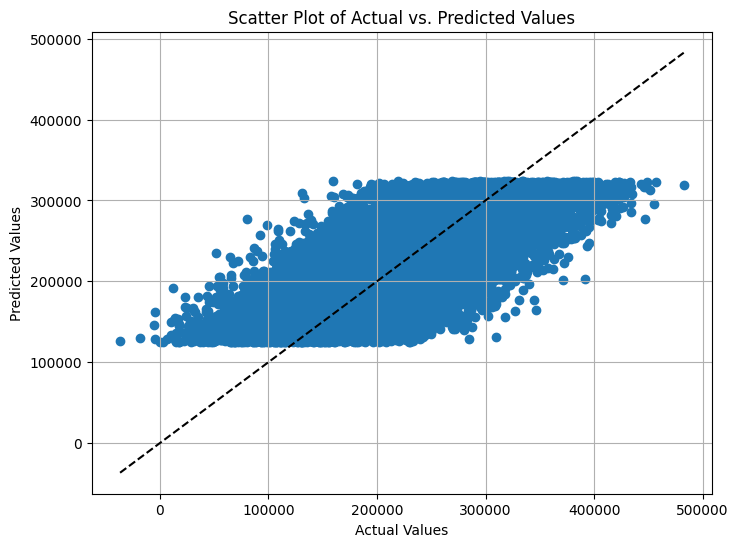

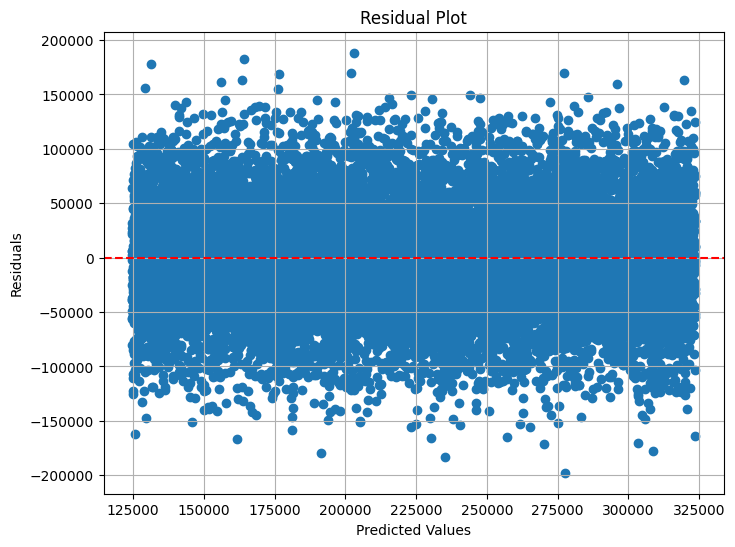

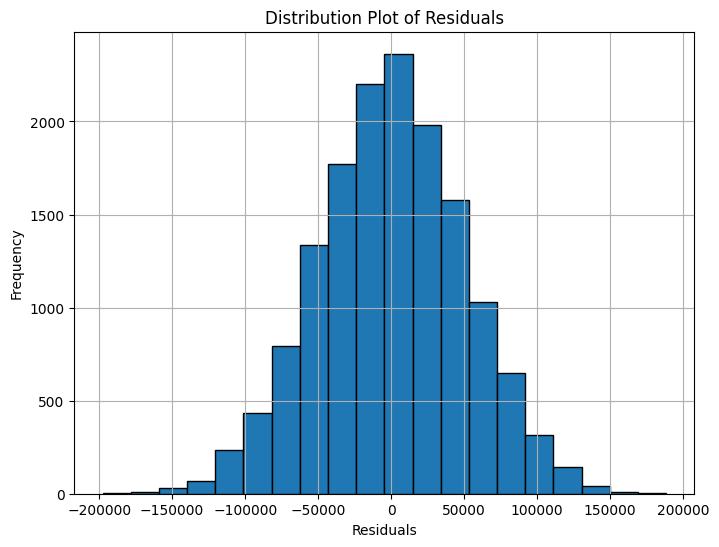

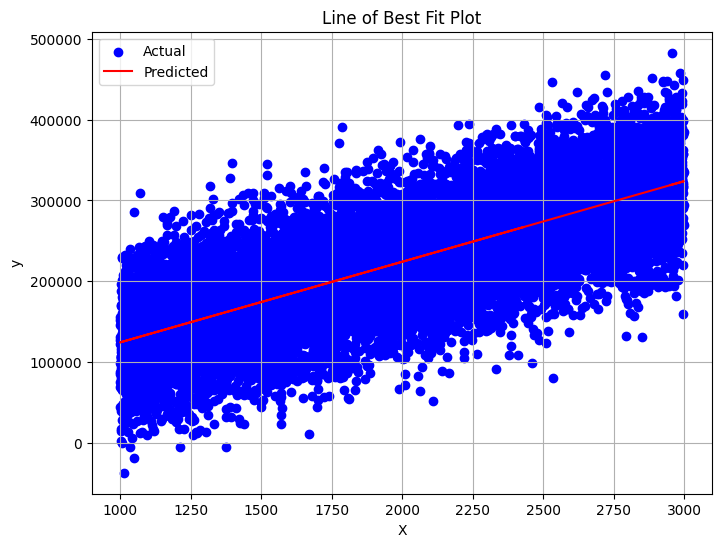

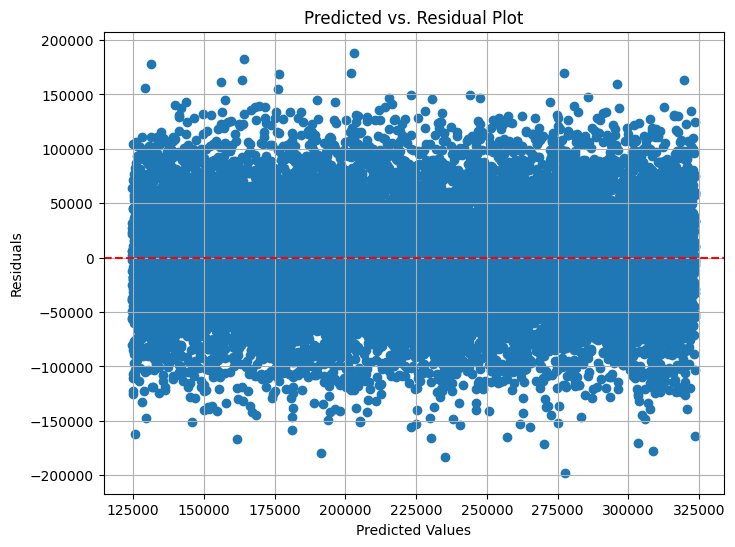

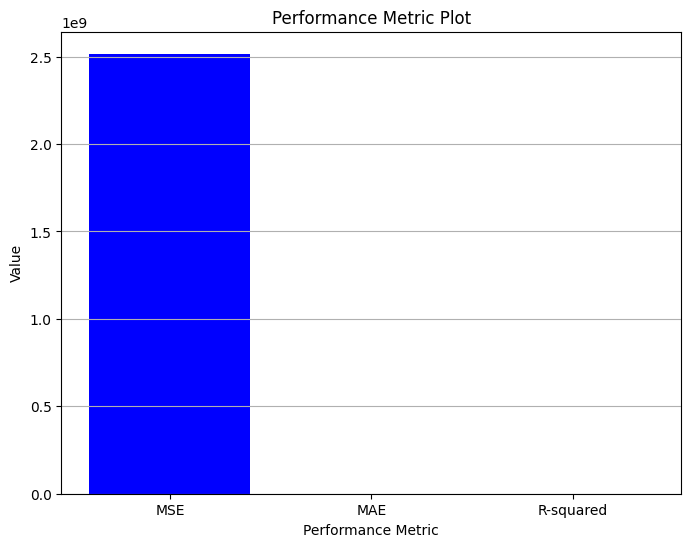

In [20]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')  # Perfect fit line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Distribution Plot of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Residuals')
plt.grid(True)
plt.show()

# Line of Best Fit Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, reg_model.predict(X_test), color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Line of Best Fit Plot')
plt.legend()
plt.grid(True)
plt.show()

# Predicted vs. Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residual Plot')
plt.grid(True)
plt.show()

# Leverage Plot (Not provided as scikit-learn does not directly provide leverage values)

# Performance Metric Plot (using MSE, MAE, R-squared)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics = ['MSE', 'MAE', 'R-squared']
values = [mse, mae, r2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.title('Performance Metric Plot')
plt.grid(axis='y')
plt.show()

# Print Coefficent and Intercept

In [15]:
print(reg_model.intercept_,reg_model.intercept_)

24918.198842284997 24918.198842284997
